In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BTC.csv to BTC.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("BTC.csv")
df.head()


,Crypto,Date,Open,High,Low,Close
0,BTC,12/31/19,7254.0,7309.0,7132.0,7171.0
1,BTC,12/30/19,7402.0,7430.0,7217.0,7254.0
2,BTC,12/29/19,7334.0,7529.0,7295.0,7402.0
3,BTC,12/28/19,7235.0,7359.0,7235.0,7334.0
4,BTC,12/27/19,7208.0,7267.0,7087.0,7235.0


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crypto  1974 non-null   object 
 1   Date    1974 non-null   object 
 2   Open    1974 non-null   float64
 3   High    1974 non-null   float64
 4   Low     1974 non-null   float64
 5   Close   1974 non-null   float64
dtypes: float64(4), object(2)
memory usage: 92.7+ KB


,Open,High,Low,Close
count,1974.000000,1974.000000,1974.000000,1974.000000
mean,20639.256839,21173.736069,20064.781662,20643.867275
std,16391.724861,16828.496642,15900.462608,16390.452205
min,3188.000000,3266.000000,3156.000000,3188.000000
25%,8010.000000,8213.750000,7748.000000,8007.750000
50%,11752.500000,12054.000000,11497.500000,11750.000000
75%,30955.250000,31873.750000,29689.000000,30983.250000
max,67802.000000,68925.000000,66112.000000,67802.000000


In [ ]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date (VERY IMPORTANT for time series)
df = df.sort_values('Date')

# Remove Crypto column (not useful for prediction)
df = df.drop(columns=['Crypto'])

# Check missing values
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
MA_7,0
MA_21,0


In [ ]:

df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_21'] = df['Close'].rolling(window=21).mean()

# Remove NaN values created by rolling
df = df.dropna()

df.head()


,Date,Open,High,Low,Close,MA_7,MA_21
689,2018-02-10,8548.0,9071.0,8165.0,8269.0,8012.571429,9692.142857
688,2018-02-11,8269.0,8587.0,7845.0,8313.0,8043.714286,9547.619048
687,2018-02-12,8313.0,8903.0,8030.0,8830.0,8283.428571,9479.333333
686,2018-02-13,8830.0,8977.0,8370.0,8564.0,8399.000000,9364.095238
685,2018-02-14,8553.0,9368.0,8483.0,9283.0,8568.571429,9272.428571


In [ ]:
X = df[['Open', 'High', 'Low', 'MA_7', 'MA_21']]
y = df['Close']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 199.07435824719354
RMSE: 299.0038912262408
R² Score: 0.995230321693201


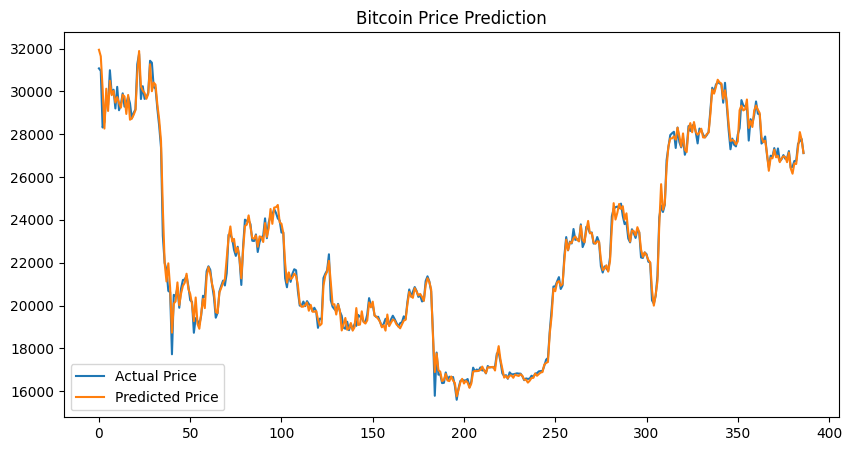

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.legend()
plt.title("Bitcoin Price Prediction")
plt.show()
